In [1]:
import pandas as pd

electric_cars = pd.read_csv('Cheapestelectriccars-EVDatabase.csv')
electric_cars.sample(5)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
154,Polestar 2 Long Range Dual Motor,Battery Electric Vehicle | 75 kWh,4.7 sec,205 km/h,395 km,190 Wh/km,510 km/h,All Wheel Drive,5,"€52,500","£45,900"
83,Nissan Ariya e-4ORCE 63kWh,Battery Electric Vehicle | 63 kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,All Wheel Drive,5,"€50,000","£45,000"
131,Volvo C40 Recharge,Battery Electric Vehicle | 75 kWh,4.7 sec,180 km/h,340 km,221 Wh/km,440 km/h,All Wheel Drive,5,"€62,050","£57,400"
26,Porsche Taycan 4 Cross Turismo,Battery Electric Vehicle | 83.7 kWh,5.1 sec,220 km/h,405 km,207 Wh/km,850 km/h,All Wheel Drive,4,"€93,635","£79,340"
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN


* Clean col names
* Create linear model acceleration, top speed & range

In [2]:
ecars_cl = (electric_cars
    .assign(
        acceleration_in_sec = lambda df_ : df_['Acceleration'].str.replace(' sec', '').astype('float32'), 
        top_speed_km_h = lambda df_ : df_['TopSpeed'].str.replace(' km/h','').astype('int32'), 
        range_km = lambda df_ : df_['Range'].str.replace(' km','').astype('int32'), 
        price = lambda df_ : df_['PriceinGermany'].str.replace('[ €]|[,]', '', regex=True).astype('float32')
        )
    .filter(['acceleration_in_sec','top_speed_km_h','range_km','price'])
    .dropna()
)

ecars_cl.sample(5)

,acceleration_in_sec,top_speed_km_h,range_km,price
102,12.1,130,185,50880.0
144,7.4,185,385,45100.0
110,13.3,130,270,59800.0
61,5.7,190,475,58300.0
124,2.1,322,535,126990.0


Text(0, 0.5, 'price')

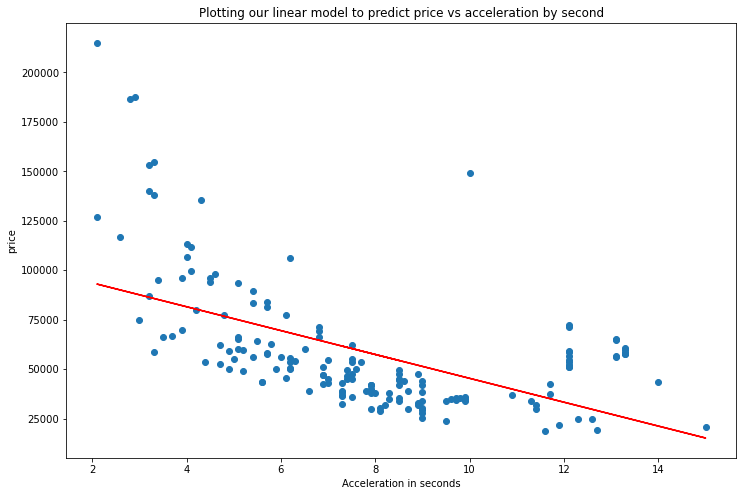

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

pred_vars = ['acceleration_in_sec']
X = np.array(ecars_cl[pred_vars]).reshape(-1, 1)
y = ecars_cl['price']

lm = LinearRegression()
lm.fit(X, y)

price_preds = lm.predict(X)

fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(X, y)
plt.plot(X, price_preds, color='red')

ax.set_title('Plotting our linear model to predict price vs acceleration by second')
ax.set_xlabel('Acceleration in seconds')
ax.set_ylabel('price')

In [4]:
lm.coef_

array([-6034.475], dtype=float32)

In [5]:
lm.intercept_

105657.8

Linear mode formula based on acceleration: 

$$
price = 105657.81 + (-6034.477)*acceleration\_in\_sec
$$

Text(0, 0.5, 'price')

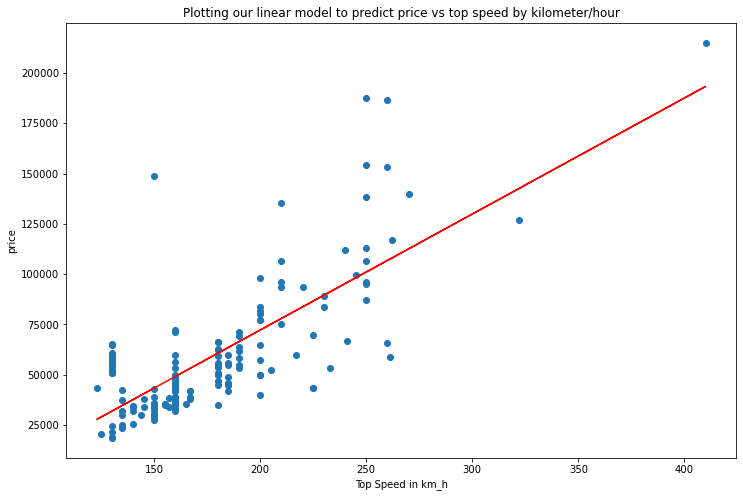

In [6]:
pred_vars = ['top_speed_km_h']
X = np.array(ecars_cl[pred_vars]).reshape(-1, 1)
y = ecars_cl['price']

lm = LinearRegression()
lm.fit(X, y)

price_preds = lm.predict(X)

fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(X, y)
plt.plot(X, price_preds, color='red')

ax.set_title('Plotting our linear model to predict price vs top speed by kilometer/hour')
ax.set_xlabel('Top Speed in km_h')
ax.set_ylabel('price')

In [7]:
lm.coef_

array([576.72544447])

In [8]:
lm.intercept_

-43145.610504347715

Text(0, 0.5, 'price')

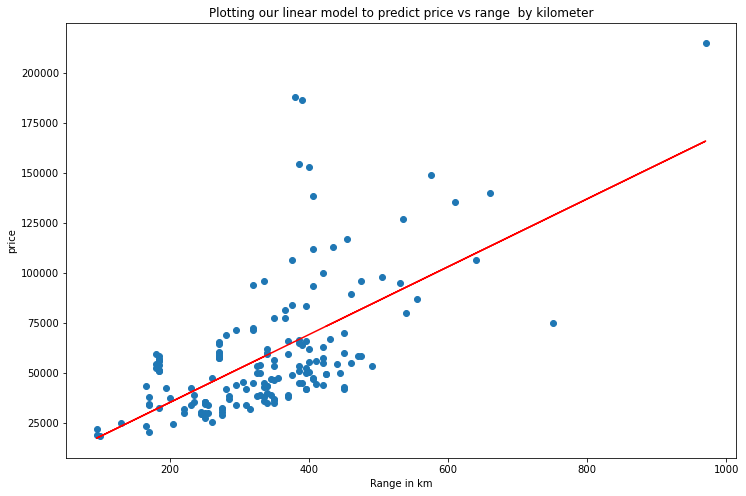

In [9]:
pred_vars = ['range_km']
X = np.array(ecars_cl[pred_vars]).reshape(-1, 1)
y = ecars_cl['price']

lm = LinearRegression()
lm.fit(X, y)

price_preds = lm.predict(X)

fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(X, y)
plt.plot(X, price_preds, color='red')

ax.set_title('Plotting our linear model to predict price vs range  by kilometer')
ax.set_xlabel('Range in km')
ax.set_ylabel('price')

In [10]:
lm.coef_

array([169.56335236])

In [11]:
lm.intercept_

1346.3596338269563